In [1]:
import numpy as np
import pandas as pd
from tools import load_data
from pt_preprocessing.imputation import fill_na, fill_na_mode, fill_lr, drop_na_naive, fill_knn

In [2]:
df = load_data('ufo_sightings.csv')

/Users/ptyshevs/py_env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3185: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):
/Users/ptyshevs/py_env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


In [3]:
df.isna().sum()

datetime          694
city                0
state            5797
country          9670
shape            1932
duration_sec        3
duration_long       0
comments           15
date posted         0
latitude            1
longitude           0
dtype: int64

In [4]:
df.comments = fill_na_mode(df.comments)

In [5]:
df['duration_sec'] = fill_na(df['duration_sec'])

In [6]:
df[df.latitude.isna()]

,datetime,city,state,country,shape,duration_sec,duration_long,comments,date posted,latitude,longitude
43782,1974-05-22 05:30:00,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,NaN,-105.624152


In [7]:
fill_lr(df.loc[:, ['longitude', 'duration_sec']].values, df.latitude) # imputing latitude using linear regression

In [8]:
df.iloc[43782:43783, :]

,datetime,city,state,country,shape,duration_sec,duration_long,comments,date posted,latitude,longitude
43782,1974-05-22 05:30:00,mescalero indian reservation,nm,NaN,rectangle,180.0,two hours,Huge rectangular object emmitting intense whit...,2012-04-18,39.832711,-105.624152


In [9]:
df = df.drop('duration_long', 1)

In [10]:
df[df['shape'].isna()].head()

,datetime,city,state,country,shape,duration_sec,comments,date posted,latitude,longitude
62,1995-10-10 19:45:00,milwaukee,wi,us,NaN,120.0,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,1999-11-02,43.038889,-87.906389
63,1995-10-10 22:40:00,oakland,ca,us,NaN,60.0,Woman repts. bright light in NW sky&#44 sudde...,1999-11-02,37.804444,-122.269722
239,2011-10-10 19:30:00,murfeesboro/smyrna,tn,NaN,NaN,2700.0,Multi color oblect over Smyrna/Murfreesboro 10...,2011-10-19,35.947474,-86.488367
285,1986-10-11 20:30:00,alice springs (nt&#44 australia),NaN,au,NaN,20.0,Being of light reported&#44Jesus or another m...,2005-01-19,-23.697479,133.883621
293,1995-10-11 18:30:00,new york city (brooklyn),ny,us,NaN,720.0,Young man&#44 mother witness watch strange red...,1999-11-02,40.714167,-74.006389


In [11]:
df['shape'] = fill_knn(df.loc[:, ['longitude', 'latitude', 'duration_sec']].values, df['shape'].astype(object), k=1)

In [12]:
df.iloc[[62, 63, 239, 285, 293], :].head()

,datetime,city,state,country,shape,duration_sec,comments,date posted,latitude,longitude
62,1995-10-10 19:45:00,milwaukee,wi,us,circle,120.0,Man on Hwy 43 SW of Milwaukee sees large&#44 ...,1999-11-02,43.038889,-87.906389
63,1995-10-10 22:40:00,oakland,ca,us,cylinder,60.0,Woman repts. bright light in NW sky&#44 sudde...,1999-11-02,37.804444,-122.269722
239,2011-10-10 19:30:00,murfeesboro/smyrna,tn,NaN,other,2700.0,Multi color oblect over Smyrna/Murfreesboro 10...,2011-10-19,35.947474,-86.488367
285,1986-10-11 20:30:00,alice springs (nt&#44 australia),NaN,au,other,20.0,Being of light reported&#44Jesus or another m...,2005-01-19,-23.697479,133.883621
293,1995-10-11 18:30:00,new york city (brooklyn),ny,us,light,720.0,Young man&#44 mother witness watch strange red...,1999-11-02,40.714167,-74.006389


In [13]:
# df.country = fill_knn(df.loc[:, ['longitude', 'latitude', 'duration_sec']].values, df['country'].astype(object), k=1)  # don't do this

In [14]:
df.isna().sum()

datetime         694
city               0
state           5797
country         9670
shape              0
duration_sec       0
comments           0
date posted        0
latitude           0
longitude          0
dtype: int64

In [15]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
import plotly.graph_objs as go
init_notebook_mode(connected=True)

In [16]:
df_s = df.sample(n=1000)

In [17]:
data = [dict(type="scattergeo",
        lon=df_s.longitude,
        lat=df_s.latitude,
        mode='markers',
        marker = dict(
            size=3,
            opacity=0.8,
            colorscale='Viridis'),
        transforms = [dict(type='groupby',
                          groups=df_s['shape'].fillna(method='ffill'))],
            )]

In [18]:
layout = dict(geo = dict(showland=True,
                         landcolor="rgb(250, 250, 250)"))

In [19]:
fig = dict(data=data, layout=layout)

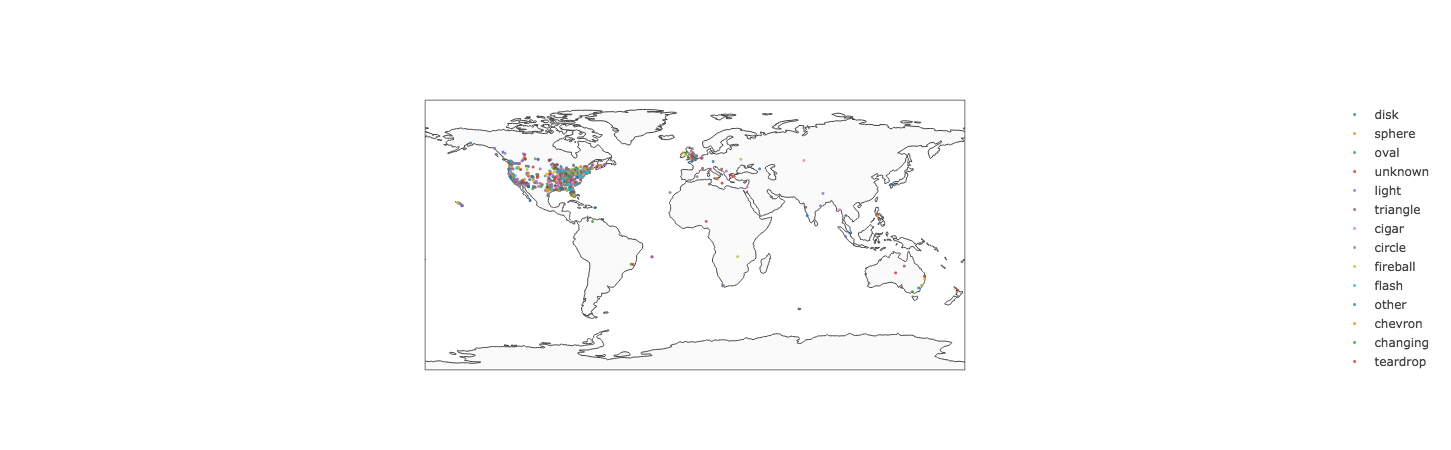

In [20]:
iplot(fig, validate=False)

In [22]:
df.to_csv("clean_ufo_sightings.csv", index=False)